Imports

In [1]:
#------------------ General Purpose Imports ---------------------#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
import pickle

#------------------ Machine Learning Imports ---------------------#
import torch
import scipy
import torch.utils.data
from sklearn.model_selection import train_test_split

#------------------ Dataset imports ---------------------#
import dysts
from dysts import flows


In [2]:
#------------------ system imports ---------------------#
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))

#------------------ reservoirgrid imports ---------------------#
from reservoirgrid.models import Reservoir
from reservoirgrid.helpers import utils
from reservoirgrid.helpers import viz
from reservoirgrid.helpers import chaos_utils
from reservoirgrid.helpers import reservoir_tests
#--------------------------------------------------------------#

device setting

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Loading Datasets

In [4]:
system_name = "Lorenz"
path = "../../reservoirgrid/datasets/Chaotic/" + system_name + ".npy"

if not os.path.exists(path):
    print("System does not exist, Generate First")
else:
    print("System exist, loading from datasets")
    system = np.load(path, allow_pickle=True)
    print("System loaded")

System exist, loading from datasets
System loaded


## Data processing

In [5]:
T_system = utils.truncate(system) #truncated system to have same periods
pp_select = 19

input = T_system[pp_select][1] # selecting the sample 
input = utils.normalize_data(input)

In [6]:
T_system['pp']

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

Vizulizing Datasets

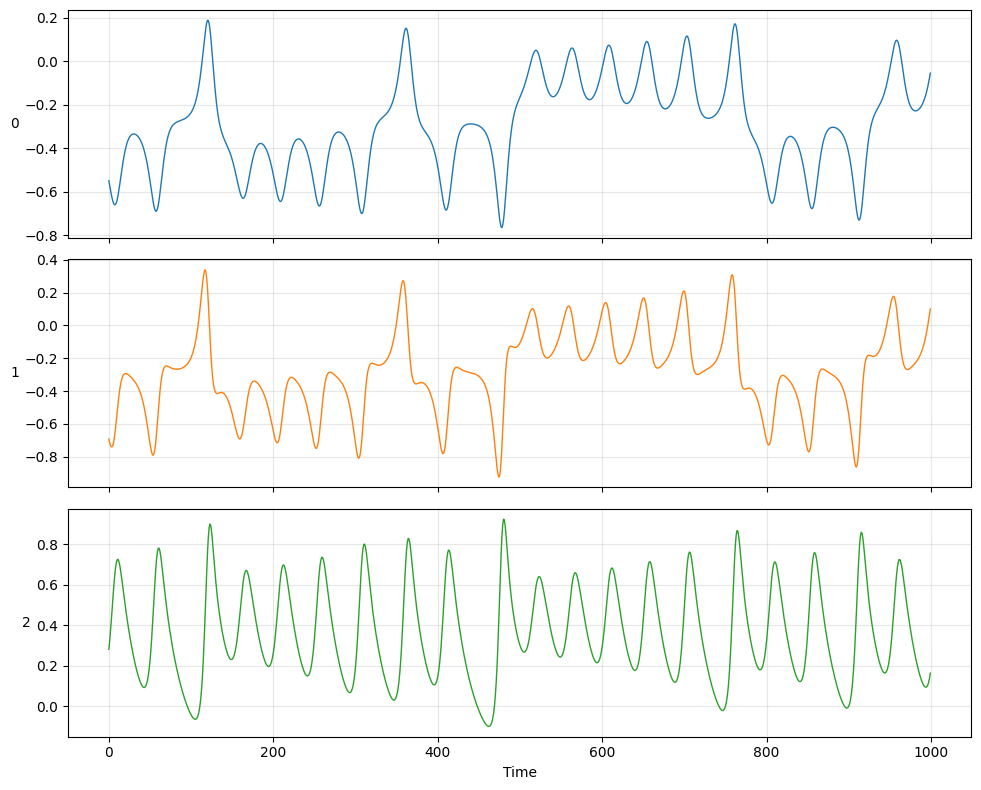

In [7]:
viz.plot_components(input[:1000])

## Trainig and predictions

In [8]:
parameter_dict = {
    "SpectralRadius": [0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
    "LeakyRate": [0.1, 0.3, 0.5, 0.7, 0.9, 0.95],
    "InputScaling": [0.05, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
}

In [9]:
parameter_dict_single = {
    "SpectralRadius": [1.0],
    "LeakyRate": [0.5],
    "InputScaling": [0.5]
}

results = utils.parameter_sweep(inputs=input, parameter_dict=parameter_dict_single, 
                        reservoir_dim=1300, input_dim= 3, 
                        output_dim=3, sparsity=0.9, return_targets=True)

[Data preparation] elapsed: 0.00s

Combination 1/1 - SR: 1.0, LR: 0.5, IS: 0.5
[Model init] elapsed: 10.52s
Readout training complete.
[Training] elapsed: 11.43s
[Prediction] elapsed: 22.62s
[State extraction] elapsed: 0.00s
RMSE: 0.3406 | Iter time: 44.57s


saving the results

In [10]:
# #results = np.ones(100)
pp_num = str(T_system[pp_select][0])
result_path = "results/test/" + system_name + "/" + pp_num + ".pkl"
with open(result_path , 'wb') as f:
    pickle.dump(results, f)

## Visulization

In [13]:
param_num = 0
print(results[param_num]['parameters'], results[param_num]['metrics'])
predictions = results[param_num]['predictions']
test_targets = results[param_num]['true_value']
reservoir_states_downed = results[param_num]['reservoir_states']

{'SpectralRadius': 1.0, 'LeakyRate': 0.5, 'InputScaling': 0.5} {'RMSE': 0.34058729260375725}


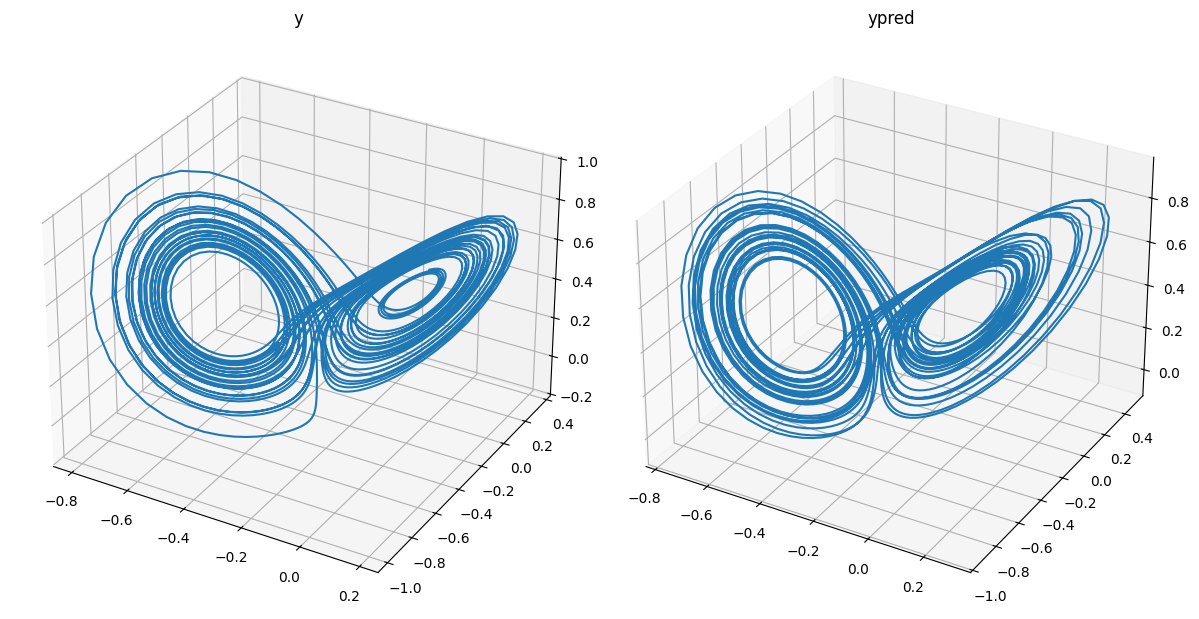

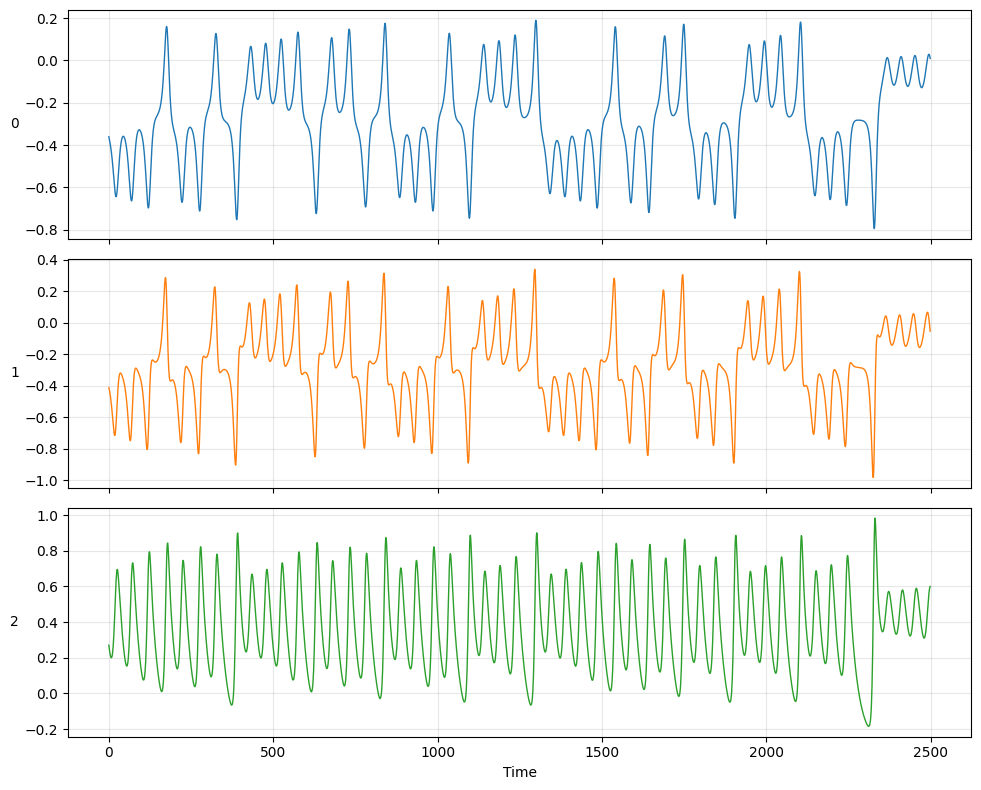

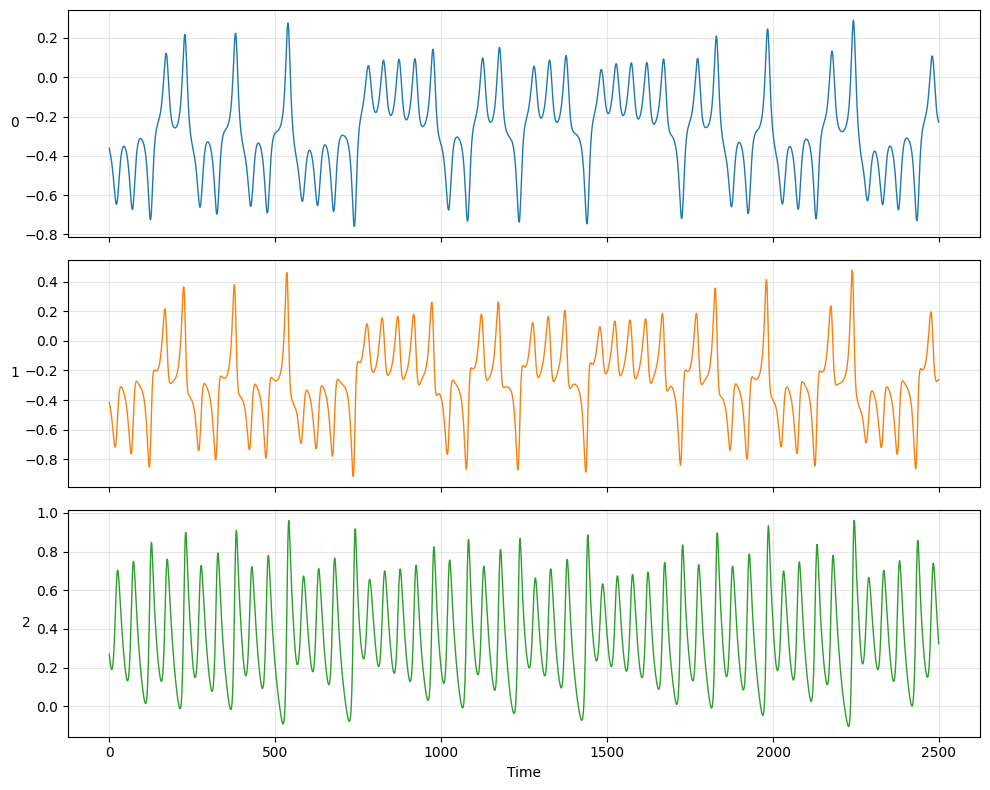

In [14]:
for_plot = test_targets[:,:3], predictions[:,:3]
viz.compare_plot(for_plot, titles=["y", "ypred"])
viz.plot_components(test_targets[:], linewidth=1)
viz.plot_components(predictions[:], linewidth=1)

In [ ]:
with open('results/Lorenz/5.0_float64.pkl', 'rb') as file:
    data = pickle.load(file)

print(data)

[{'parameters': {'SpectralRadius': 0.7, 'LeakyRate': 0.1, 'InputScaling': 0.05}, 'predictions': array([[-0.14581864, -0.10584016,  0.14202603],
       [-0.14490358, -0.16554141,  0.56856778],
       [-0.15169809, -0.1508673 ,  0.3924949 ],
       [-0.16087026, -0.16884187,  0.46550565],
       [-0.16872106, -0.17301402,  0.43514401],
       [-0.17719526, -0.18298942,  0.44758241],
       [-0.18546459, -0.19054813,  0.44218422],
       [-0.1937761 , -0.19901574,  0.44410922],
       [-0.20195286, -0.20694378,  0.44293205],
       [-0.20999842, -0.21486812,  0.44298628],
       [-0.21784641, -0.22250704,  0.442485  ],
       [-0.22546487, -0.22992325,  0.4421795 ],
       [-0.23281311, -0.23704202,  0.44176839],
       [-0.23985965, -0.24385098,  0.44138644],
       [-0.24657479, -0.25031721,  0.44098709],
       [-0.25293369, -0.25642158,  0.44059843],
       [-0.258915  , -0.2621444 ,  0.44021696],
       [-0.26450133, -0.26747127,  0.43985157],
       [-0.26967892, -0.27239049,  0.439

In [ ]:
np.array(data[0]['reservoir states']).dtype

dtype('float64')